# Import library

In [274]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
from scipy.sparse import csgraph

#load Dataset

In [275]:
%cd D:/home work 1
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')
df

D:\home work 1


,a,b
0,2.7147,0.81472
1,2.8054,0.94572
2,2.0253,0.20682
3,2.8096,1.03310
4,2.5257,0.79188
...,...,...
895,5.8968,-4.19650
896,3.5603,-8.78640
897,7.0303,-8.00040
898,5.4921,-5.49120


## $\boldsymbol{k=10}$ in Circle dataset

In [276]:
#Question1 k=10
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=10, metric_params=None, include_self=False) # p=k=10
W = W.toarray()
print("The adjacency matrix is: ")
print(W)

The adjacency matrix is: 
[[0.000 0.131 0.707 ... 0.000 0.000 0.000]
 [0.131 0.000 0.817 ... 0.000 0.000 0.000]
 [0.707 0.817 0.000 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 0.000]]


In [277]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.094 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 28.044 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 28.075 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.605 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 48.593 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.244]]


In [278]:
#Question2
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.094 -0.131 -0.707 ... -0.000 -0.000 -0.000]
 [-0.131 28.044 -0.817 ... -0.000 -0.000 -0.000]
 [-0.707 -0.817 28.075 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.605 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 48.593 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.244]]
The first 5 values of L are: 
[[32.094 -0.131 -0.707 -0.218 -0.189]
 [-0.131 28.044 -0.817 -0.087 -0.280]
 [-0.707 -0.817 28.075 -0.866 -0.596]
 [-0.218 -0.087 -0.866 27.103 -0.289]
 [-0.189 -0.280 -0.596 -0.289 33.225]]


In [279]:
#Question3: compute connected components there are in the similarity graph
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print("Cosine Similarity is : ", cosine)

Cosine Similarity is :  -0.7272658115521661


In [280]:
#Question4
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[76.405 74.645 73.200 69.831 69.681 69.190 68.663 68.192 67.823 67.570
 67.187 65.596 66.872 66.202 66.493 66.518 65.629 65.055 64.794 64.638
 64.514 64.032 63.601 63.452 63.124 62.725 62.804 62.347 62.183 62.021
 61.866 61.380 61.245 61.069 60.888 60.728 60.063 60.407 60.315 59.538
 59.459 59.118 58.916 58.725 58.736 58.521 58.381 58.360 57.638 56.703
 57.395 57.121 57.046 55.935 55.740 55.639 55.231 54.714 54.400 54.217
 53.984 0.435 0.214 0.154 0.008 53.561 53.290 53.393 53.049 52.819 52.630
 52.326 52.490 52.437 52.026 51.901 47.110 51.620 51.564 51.507 48.130
 51.379 0.000 50.667 50.711 51.185 51.033 51.059 50.356 50.210 -0.000
 49.219 49.648 50.276 50.950 49.518 48.901 48.841 48.520 48.652 48.214
 49.460 0.810 0.852 0.994 1.127 1.393 1.558 1.732 2.004 1.829 1.777 2.126
 2.602 3.031 47.014 47.564 47.625 47.408 47.309 46.791 45.721 46.667
 46.618 46.391 46.356 44.823 45.736 45.723 45.474 45.068 44.996 44.778
 44.906 44.680 44.629 44.500 44.372 44.362 43.091 40.895 40.9

In [281]:
#Question5 : construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[32.094 -0.131 -0.707 ... 0.000 0.000 0.000]
 [-0.131 28.044 -0.817 ... -0.000 0.000 -0.000]
 [-0.707 -0.817 28.075 ... -0.000 0.000 -0.000]
 ...
 [0.004 -0.001 0.004 ... 15.622 -0.007 0.001]
 [-0.050 -0.050 0.037 ... 0.023 48.572 -0.018]
 [-0.000 -0.001 0.001 ... -0.005 0.002 6.245]]


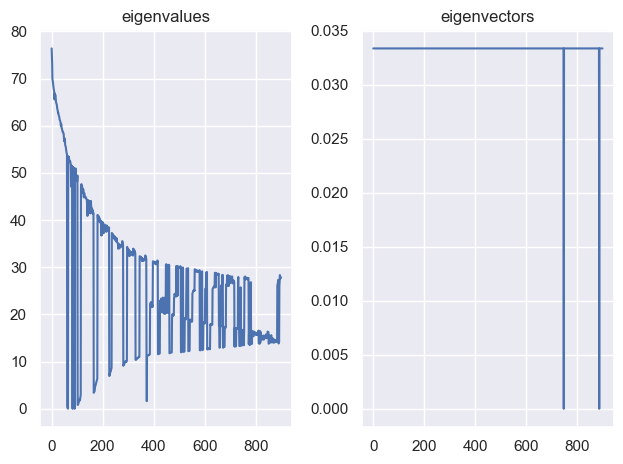

In [282]:
# eigenvalues and eigen vector plot
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')

fig.tight_layout()
plt.show()

In [283]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

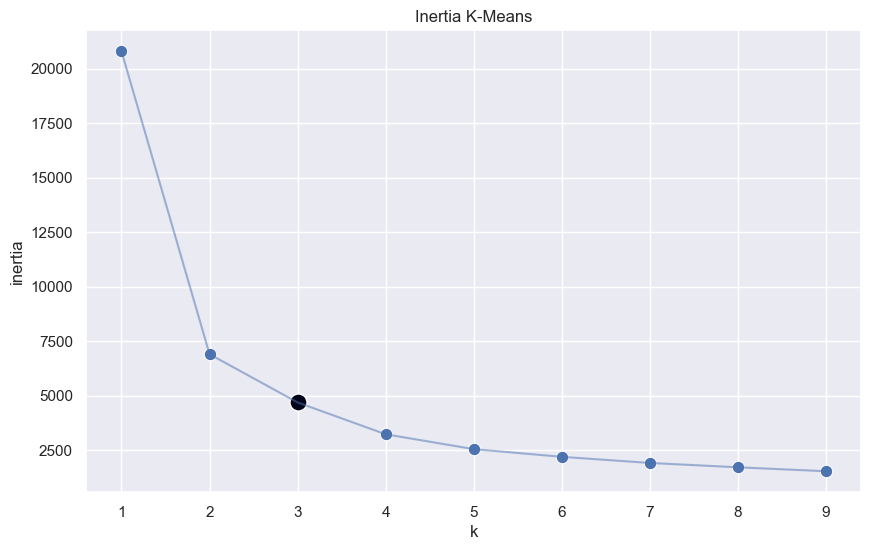

In [284]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=10, n_clusters=k)
    k_means.fit(df)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], c=[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

In [285]:
#Question 6: Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [286]:
X1 = df[['a','b']].iloc[: , :].values

In [287]:
#Question 7
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


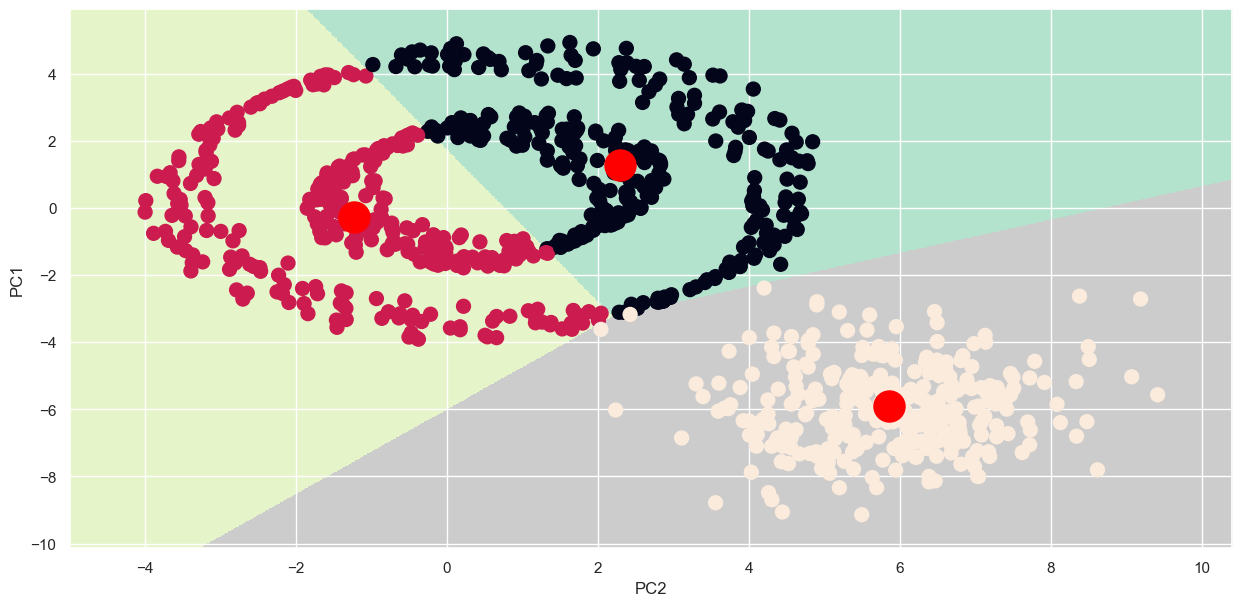

In [288]:
#Question8:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


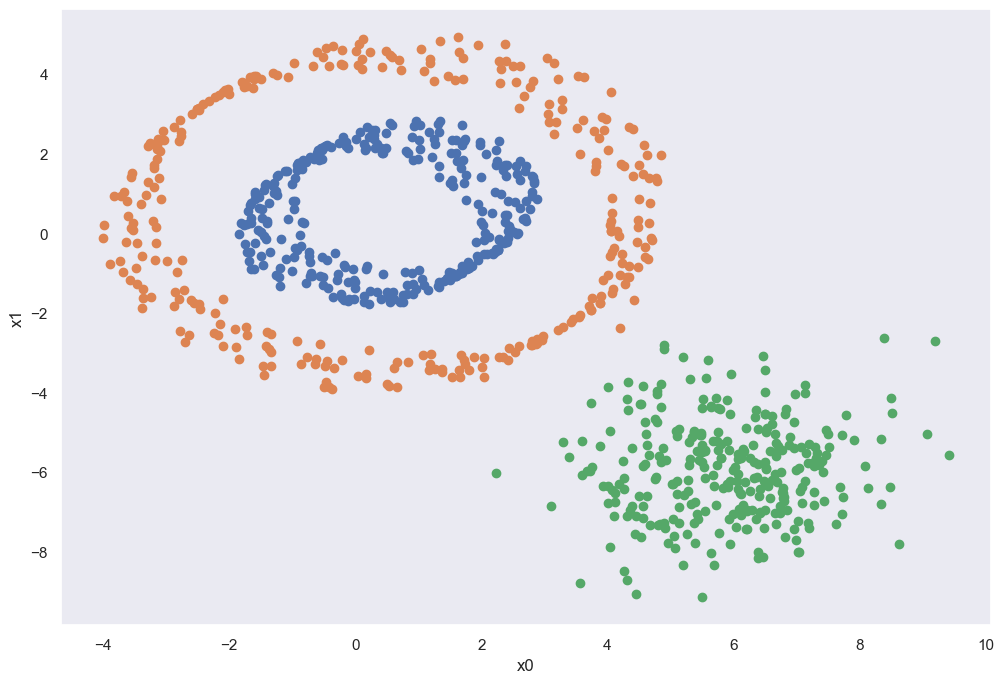

In [289]:
#Question 9:Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 10).fit(df) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=20}$ in Circle dataset

In [290]:
#Question
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=20, metric_params=None, include_self=False) # k=p=20
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.131, 0.692, ..., 0.000, 0.000, 0.000],
       [0.131, 0.000, 0.792, ..., 0.000, 0.000, 0.000],
       [0.692, 0.792, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

In [291]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.030 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 27.963 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 27.967 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.527 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 50.316 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.224]]


In [292]:
#Question2
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.030 -0.131 -0.692 ... -0.000 -0.000 -0.000]
 [-0.131 27.963 -0.792 ... -0.000 -0.000 -0.000]
 [-0.692 -0.792 27.967 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.527 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 50.316 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.224]]
The first 5 values of L are: 
[[32.030 -0.131 -0.692 -0.218 -0.189]
 [-0.131 27.963 -0.792 -0.087 -0.280]
 [-0.692 -0.792 27.967 -0.839 -0.586]
 [-0.218 -0.087 -0.839 26.989 -0.284]
 [-0.189 -0.280 -0.586 -0.284 33.121]]


In [293]:
#Question3
#compute  connected components there are in the similarity graph
from numpy.linalg import norm
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: -0.7272658115521661


In [294]:
#Question4
e, v = np.linalg.eig(L)
print("eigenvalues:",e)
print("M eigenvectors:",v)


eigenvalues: [76.970 74.962 73.582 70.437 70.264 69.737 69.281 68.658 68.441 68.056
 67.960 67.529 66.718 66.564 66.316 66.171 65.823 65.460 65.173 64.786
 64.848 64.426 64.103 64.279 63.655 63.424 63.037 62.778 62.682 62.486
 62.613 62.080 61.773 61.424 61.259 60.899 60.636 60.346 60.125 59.705
 59.467 59.340 59.379 59.068 58.856 58.672 58.203 58.273 58.327 57.956
 57.614 57.311 57.055 56.783 56.201 55.938 0.008 55.637 55.426 55.505
 55.152 54.765 54.539 54.351 54.111 48.262 53.607 53.495 53.377 53.268
 53.090 52.787 52.698 52.471 52.118 51.994 0.000 0.000 51.733 51.583
 51.821 50.780 51.343 50.452 51.035 51.142 51.274 50.347 50.096 50.083
 0.187 0.228 0.471 0.896 0.788 1.100 1.187 1.447 1.777 1.808 2.053 2.179
 2.012 2.368 2.698 49.811 49.592 49.344 49.149 49.264 49.204 48.736 48.613
 3.142 47.292 48.122 47.766 47.334 47.403 47.012 47.041 45.876 46.856
 46.701 46.542 45.804 45.960 46.264 44.842 45.586 45.311 45.212 44.892
 41.142 41.407 41.550 42.043 44.080 44.737 44.697 44.601 44.48

In [295]:
# Question5: construct the matrix U 
u=v+L
print("the U matrix is: ",u)

the U matrix is:  [[32.030 -0.131 -0.692 ... 0.000 0.000 -0.000]
 [-0.131 27.963 -0.792 ... -0.000 -0.000 0.000]
 [-0.692 -0.792 27.967 ... 0.000 -0.000 0.000]
 ...
 [-0.004 -0.000 0.004 ... 15.623 0.001 0.013]
 [0.065 -0.044 0.037 ... 0.012 50.313 -0.040]
 [0.000 -0.001 0.001 ... 0.042 0.001 6.224]]


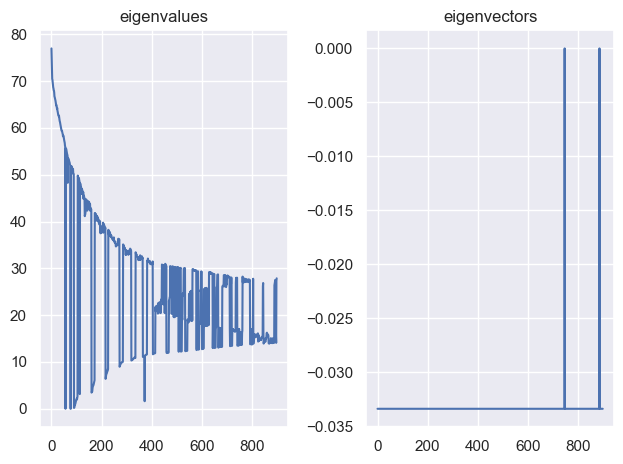

In [296]:
# eigenvalues and eigen vector plot
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [297]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

In [298]:
# Question6 
#Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 20 ,max_iter=1000,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [299]:
X1 = df[['a','b']].iloc[: , :].values

In [300]:
# Question7:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


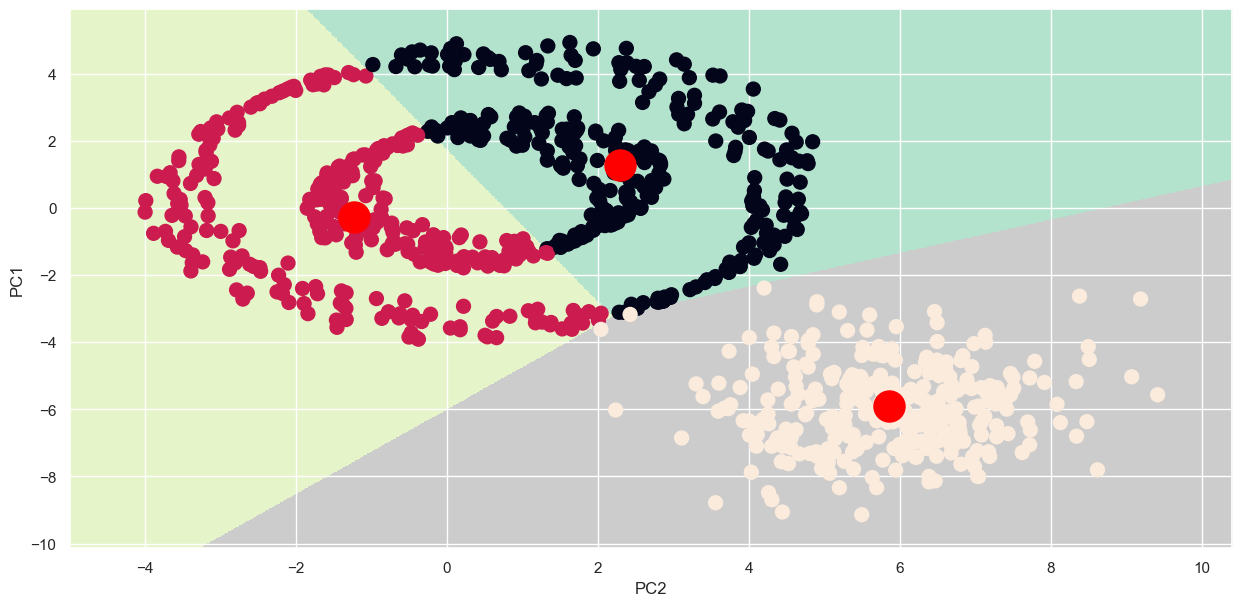

In [301]:
# Question8
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


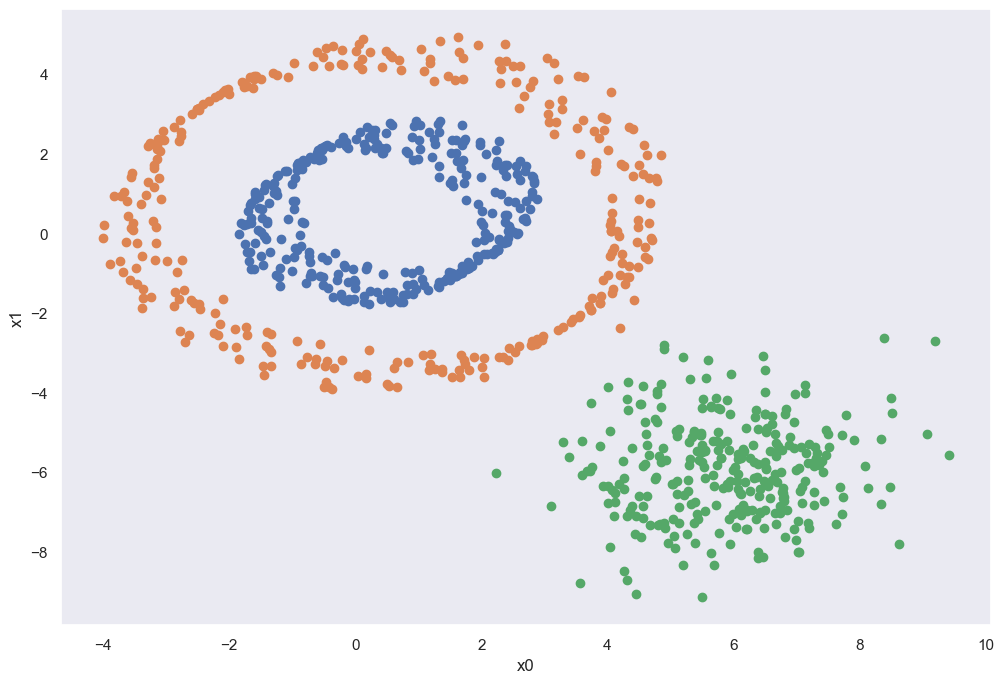

In [302]:
# Question9
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 20).fit(df) 

sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

#K=40 in Circle dataset  

In [303]:
# Question1
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(df,1,mode='distance', metric='minkowski', p=40, metric_params=None, include_self=False) # k=p=40
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.131, 0.690, ..., 0.000, 0.000, 0.000],
       [0.131, 0.000, 0.782, ..., 0.000, 0.000, 0.000],
       [0.690, 0.782, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000]])

In [304]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[32.019 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 27.948 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 27.940 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 15.506 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 50.238 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 6.221]]


In [305]:
# Question2
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[32.019 -0.131 -0.690 ... -0.000 -0.000 -0.000]
 [-0.131 27.948 -0.782 ... -0.000 -0.000 -0.000]
 [-0.690 -0.782 27.940 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 15.506 -0.000 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 50.238 -0.000]
 [-0.000 -0.000 -0.000 ... -0.000 -0.000 6.221]]
The first 5 values of L are: 
[[32.019 -0.131 -0.690 -0.218 -0.189]
 [-0.131 27.948 -0.782 -0.087 -0.280]
 [-0.690 -0.782 27.940 -0.829 -0.585]
 [-0.218 -0.087 -0.829 26.966 -0.284]
 [-0.189 -0.280 -0.585 -0.284 33.092]]


In [306]:
# Question3
#compute the cosine similarity to determine how many connected components there are in the similarity graph

from numpy.linalg import norm
  
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: -0.7272658115521661


In [307]:
# Question4
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors 
print('M eigenvectors:')
print(v)

eigenvalues:
[77.055 75.311 73.842 70.640 70.368 69.777 69.604 69.176 68.795 68.699
 68.427 67.800 66.992 66.867 66.679 66.129 65.863 65.595 65.266 65.013
 64.820 64.757 64.378 64.252 63.698 63.400 62.990 62.977 62.738 62.683
 62.556 62.227 61.993 61.557 61.379 60.997 60.747 60.726 60.330 60.043
 59.807 59.722 59.419 59.156 59.066 58.829 58.428 58.294 58.209 58.028
 57.587 57.266 57.009 56.842 56.247 56.014 55.866 55.663 55.721 54.446
 54.566 55.089 55.153 54.181 53.715 53.608 53.383 53.489 53.244 53.082
 52.887 52.737 52.449 52.306 0.193 0.231 0.479 0.008 51.653 52.027 51.991
 51.897 51.388 0.907 0.780 1.204 1.114 51.153 51.093 50.765 1.442 1.785
 50.453 50.334 50.136 0.000 50.035 49.840 48.325 1.808 49.614 2.071 -0.000
 49.378 49.217 49.192 49.120 48.748 47.319 48.576 48.140 47.943 47.658
 45.897 47.477 47.153 47.082 46.909 46.820 46.600 46.267 46.141 46.053
 42.813 43.264 45.795 44.807 45.396 45.301 44.092 44.861 43.984 44.721
 44.099 44.196 44.358 44.451 44.566 44.643 44.646 2.194 

In [308]:
#Question5
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[32.019 -0.131 -0.690 ... -0.000 -0.000 -0.000]
 [-0.131 27.948 -0.782 ... -0.000 -0.000 -0.000]
 [-0.690 -0.782 27.940 ... 0.000 0.000 0.000]
 ...
 [-0.004 -0.001 0.004 ... 15.510 0.014 0.004]
 [0.065 -0.040 0.034 ... -0.034 50.195 -0.017]
 [0.000 -0.001 0.001 ... 0.000 -0.000 6.222]]


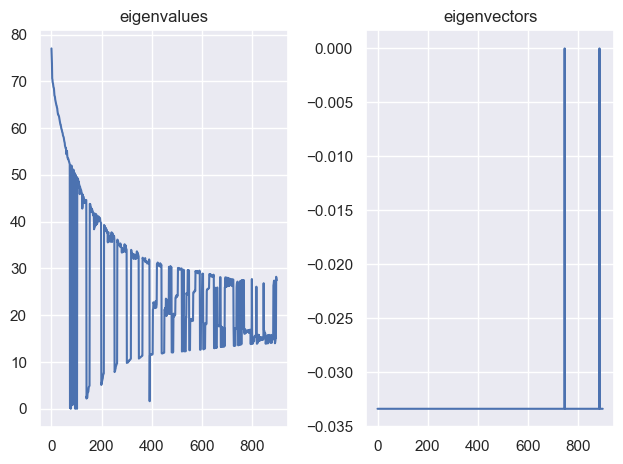

In [309]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [310]:
df=pd.read_csv('Circle.csv',names=["a", "b"], encoding='latin-1')

In [311]:
#Question6
#Compute the clusters for the Circle dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 40 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(df)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [312]:
X1 = df[['a','b']].iloc[: , :].values

In [313]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


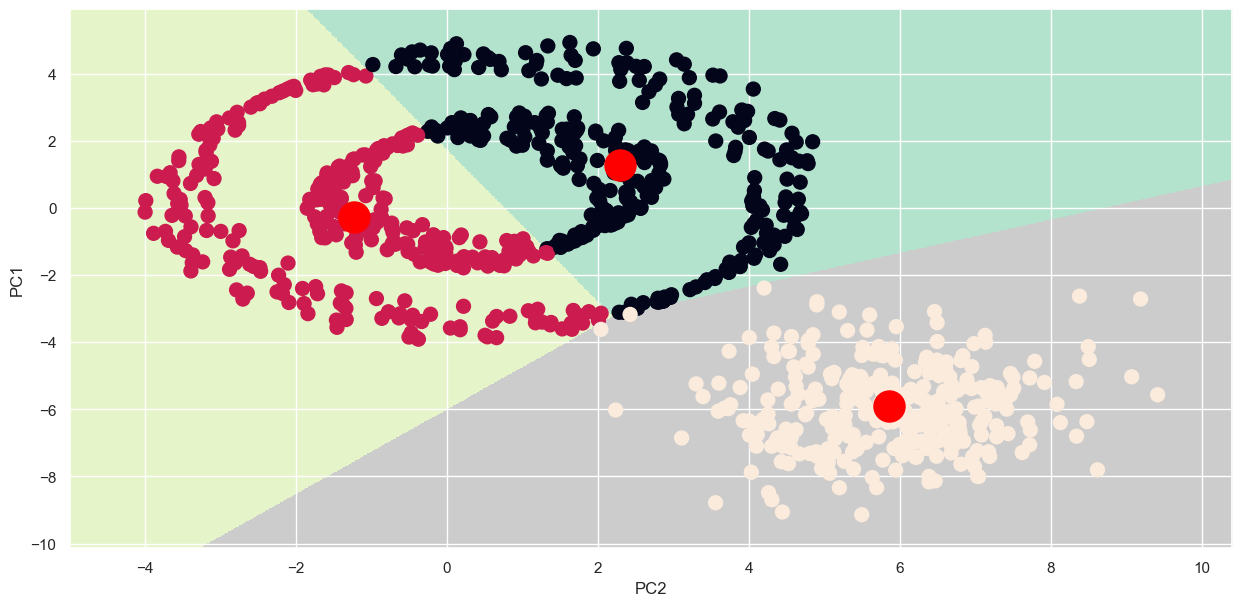

In [314]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = df, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


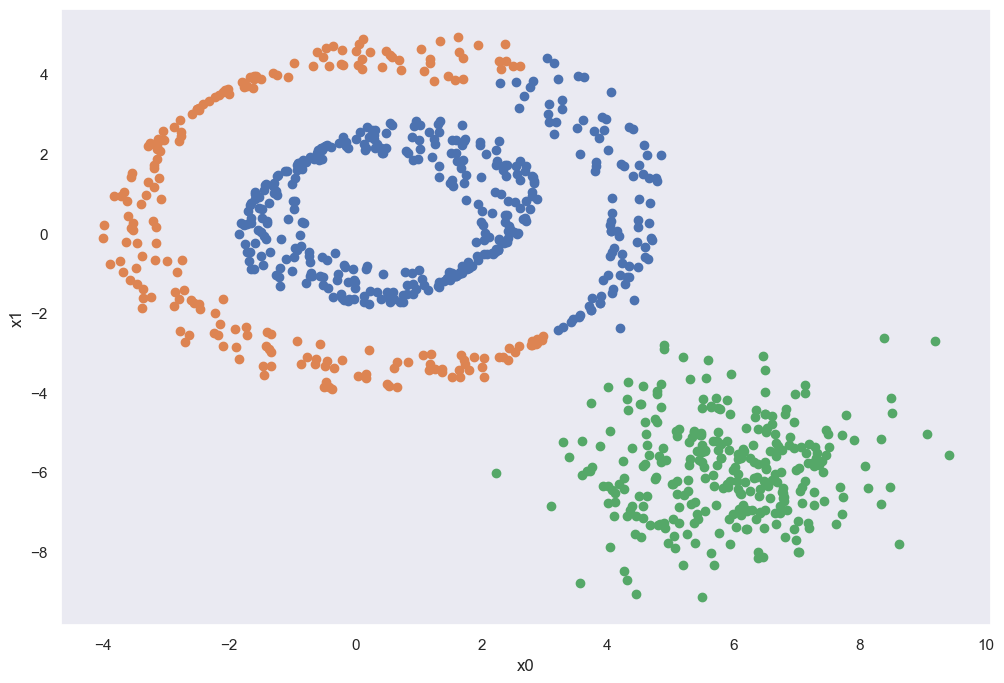

In [315]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(df)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 40).fit(df) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

# load the Spiral Dataset(SD)

In [316]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
df

,a,b,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
...,...,...,...
307,15.75,13.85,2
308,15.65,14.05,2
309,15.65,14.25,2
310,15.65,14.50,2


In [317]:
dz=df.drop(['cluster'], axis=1)

## $\boldsymbol{k=10}$ in Spiral dataset

**Question1 ($\boldsymbol{k=10}$ SD)**

In [318]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=10, metric_params=None, include_self=False) #k=p=10
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.810, 0.000, ..., 0.000, 0.000, 0.000],
       [0.810, 0.000, 0.728, ..., 0.000, 0.000, 0.000],
       [0.000, 0.728, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [319]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.810 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.537 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.494 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 2.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=10}$ ,SD)**

In [320]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.810 -0.810 -0.000 ... -0.000 -0.000 -0.000]
 [-0.810 1.537 -0.728 ... -0.000 -0.000 -0.000]
 [-0.000 -0.728 1.494 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 3.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 2.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.810 -0.810 -0.000 -0.000 -0.000]
 [-0.810 1.537 -0.728 -0.000 -0.000]
 [-0.000 -0.728 1.494 -0.766 -0.000]
 [-0.000 -0.000 -0.766 1.567 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.651]]


**Question3 ($\boldsymbol{k=10}$ , SD)**

In [321]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341674


**Question4 ($\boldsymbol{k=10}$ , SD)**

In [322]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[3.310 2.954 2.589 2.131 1.628 1.126 0.680 -0.000 0.081 0.312 9.409 8.900
 3.520 -0.000 0.001 0.005 0.013 0.057 0.038 0.030 0.077 0.101 0.139 0.160
 0.198 0.223 0.261 0.332 0.393 0.411 0.494 0.569 0.530 0.672 0.720 0.757
 0.824 0.918 0.958 1.012 1.115 1.146 1.210 1.347 1.427 1.400 3.222 2.986
 1.530 1.557 2.668 2.658 2.679 2.330 2.435 2.594 2.499 2.557 2.272 2.214
 1.657 1.661 2.042 2.113 1.860 1.965 1.956 1.926 1.778 1.790 1.808 2.146
 2.141 3.179 7.845 3.403 7.236 7.042 6.348 5.768 5.487 5.127 4.496 4.163
 3.397 2.784 3.129 3.054 2.556 2.497 2.925 5.065 5.011 2.690 4.892 3.757
 3.844 4.663 3.966 4.520 4.469 4.349 4.079 4.207 4.103 4.140 8.815 8.176
 6.991 6.694 6.327 6.116 5.872 5.731 5.502 5.050 5.987 4.900 4.738 4.615
 4.659 5.436 5.242 4.887 4.377 4.593 4.439 4.024 3.992 4.093 4.472 4.403
 4.349 4.317 4.226 3.701 4.135 4.079 3.590 3.582 3.485 3.913 3.821 3.688
 3.624 3.325 3.440 3.534 3.555 3.165 3.405 3.097 3.080 0.230 0.155 0.141
 0.092 0.062 0.043 0.107 0.032 0.012

**Question5 ($\boldsymbol{k=10}$ , SD)**

In [323]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.795 -0.899 -0.230 ... 0.000 0.000 0.000]
 [-0.763 1.775 -0.223 ... 0.000 0.000 0.000]
 [-0.096 -1.090 1.020 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 2.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


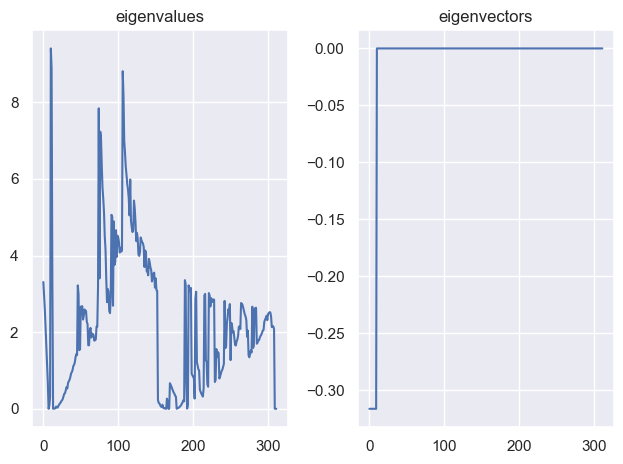

In [324]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

I run the k-means algorithm on the Spiral dataset to try to get some clusters. I select the number of cluster using the **Elbow method** by considering the inertia (sum of squared distances of samples to their closest cluster center) as a function of the number of clusters.

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment v

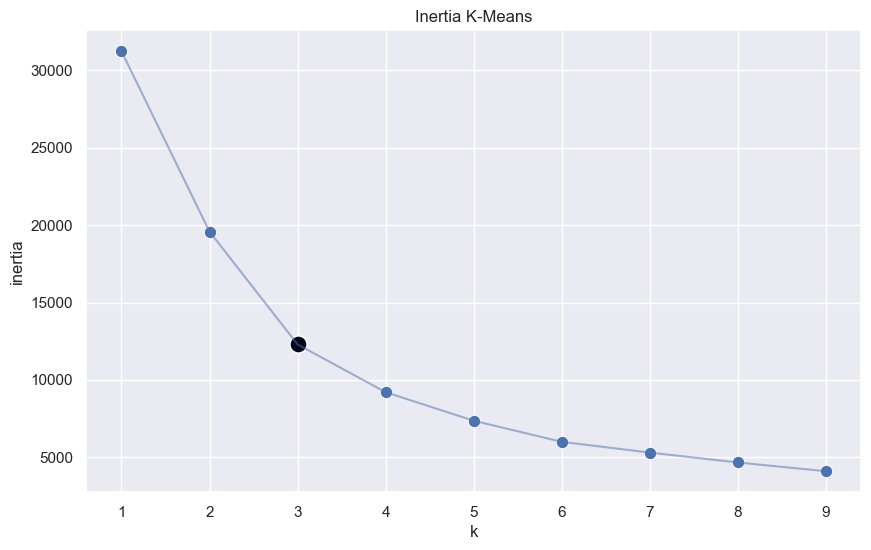

In [325]:
from sklearn.cluster import KMeans
import seaborn as sns
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(dz)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], c=[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

From this plot we see that $K=3$ is a good choice. Now I get the clusters.

**Question 6,7,8,9 ($\boldsymbol{k=10}$ , SD)**

In [326]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 10 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )  
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [327]:
X1 = dz[['a','b']].iloc[: , :].values

In [328]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


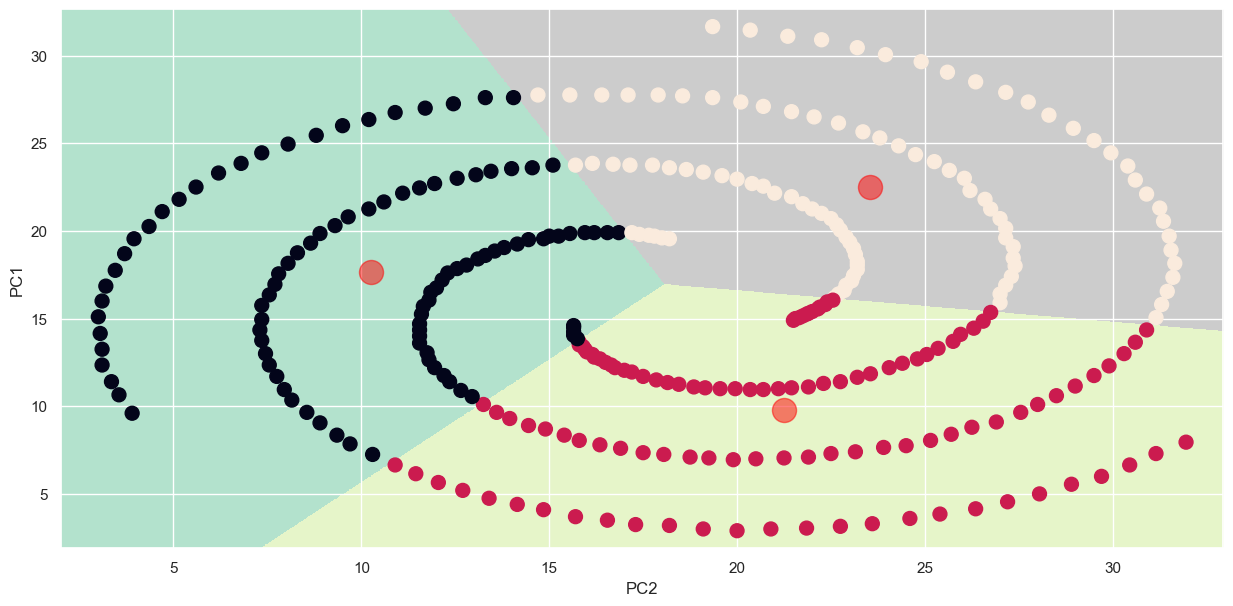

In [329]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
#plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 500, c = 'red' , alpha = 1)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


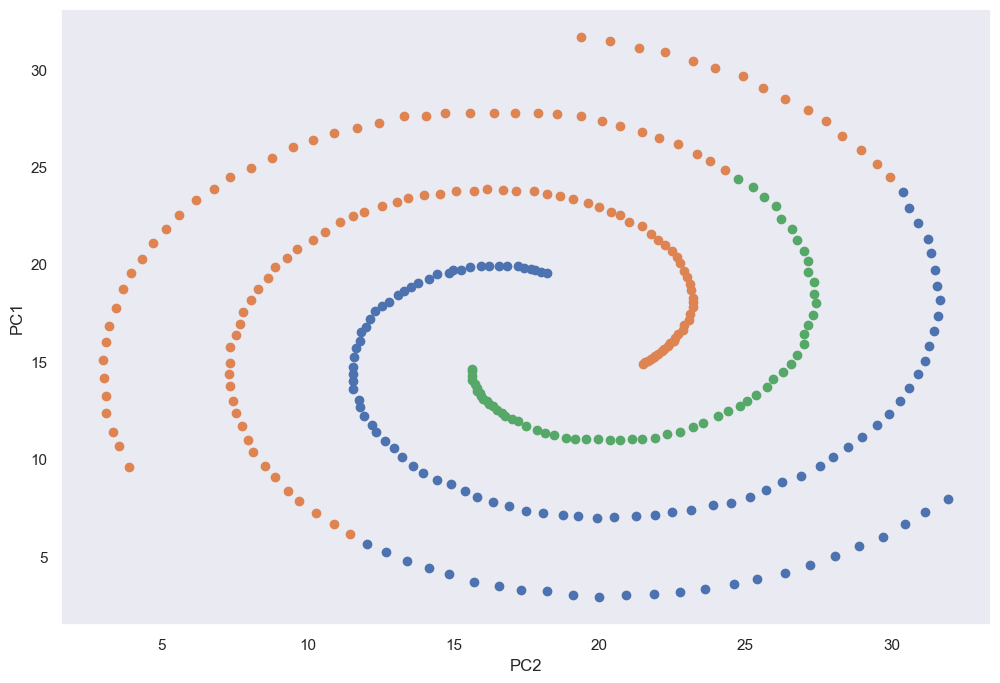

In [330]:
#Compute the clusters for the Spiral dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 10).fit(dz)  

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=20}$ in Spiral dataset

**Question1 ($\boldsymbol{k=20}$ , SD)**

In [331]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=20, metric_params=None, include_self=False) # k=p=20
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.801, 0.000, ..., 0.000, 0.000, 0.000],
       [0.801, 0.000, 0.707, ..., 0.000, 0.000, 0.000],
       [0.000, 0.707, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [332]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.801 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.508 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.459 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 3.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=20}$ , SD)**

In [333]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.801 -0.801 -0.000 ... -0.000 -0.000 -0.000]
 [-0.801 1.508 -0.707 ... -0.000 -0.000 -0.000]
 [-0.000 -0.707 1.459 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 3.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 3.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.801 -0.801 -0.000 -0.000 -0.000]
 [-0.801 1.508 -0.707 -0.000 -0.000]
 [-0.000 -0.707 1.459 -0.752 -0.000]
 [-0.000 -0.000 -0.752 1.552 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.650]]


**Question3 ($\boldsymbol{k=20}$ , SD)**

In [334]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm

# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341674


**Question4 ($\boldsymbol{k=20}$ , SD)**

In [335]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[3.307 2.936 2.556 2.118 1.618 1.120 0.675 0.000 0.080 0.309 -0.000 0.001
 0.006 0.014 0.030 0.039 0.059 0.086 0.104 0.141 0.167 0.202 0.249 0.263
 0.332 0.404 0.488 0.520 0.560 0.585 0.673 0.750 0.821 0.872 0.935 1.005
 1.118 1.202 1.273 1.343 1.389 1.419 1.648 1.549 1.576 2.302 2.260 2.205
 2.137 2.097 1.695 1.783 1.840 1.859 1.994 1.941 1.957 9.302 3.520 2.117
 1.790 8.799 3.222 2.429 7.756 2.985 2.557 2.493 7.116 6.968 2.667 2.658
 2.563 6.257 5.736 3.151 2.666 5.460 5.085 3.390 3.406 3.332 5.027 4.410
 4.065 3.108 2.978 3.053 4.928 2.482 2.533 2.909 2.706 4.798 2.677 4.575
 4.302 4.440 4.413 3.738 3.826 3.959 4.164 4.090 4.082 4.017 8.871 8.121
 6.946 6.656 6.283 6.164 6.012 5.834 5.576 5.154 4.976 5.986 5.718 5.221
 4.715 4.698 4.597 4.530 4.909 4.089 3.984 4.030 3.692 4.686 4.024 4.543
 4.348 4.378 4.384 4.314 4.233 0.021 0.013 0.005 0.001 0.000 -0.000 4.163
 4.109 3.595 3.570 3.486 3.978 3.938 3.398 3.794 0.196 0.168 0.143 0.107
 0.094 0.063 0.047 0.032 0.001 0.006

**Question5 ($\boldsymbol{k=20}$ , SD)**

In [336]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.788 -0.879 -0.230 ... 0.000 0.000 0.000]
 [-0.761 1.716 -0.203 ... 0.000 0.000 0.000]
 [-0.086 -1.040 0.972 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 3.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 3.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


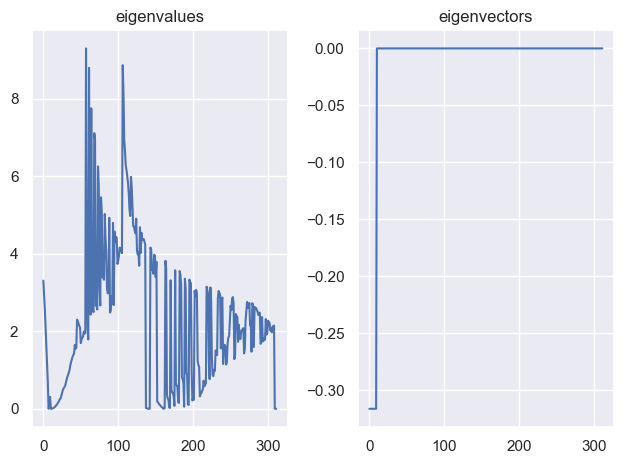

In [337]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [338]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
dz=df.drop(['cluster'], axis=1)

**Question 6,7,8,9 ($\boldsymbol{k=20}$ , SD)**

In [339]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 20 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') )
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [340]:
X1 = dz[['a','b']].iloc[: , :].values

In [341]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


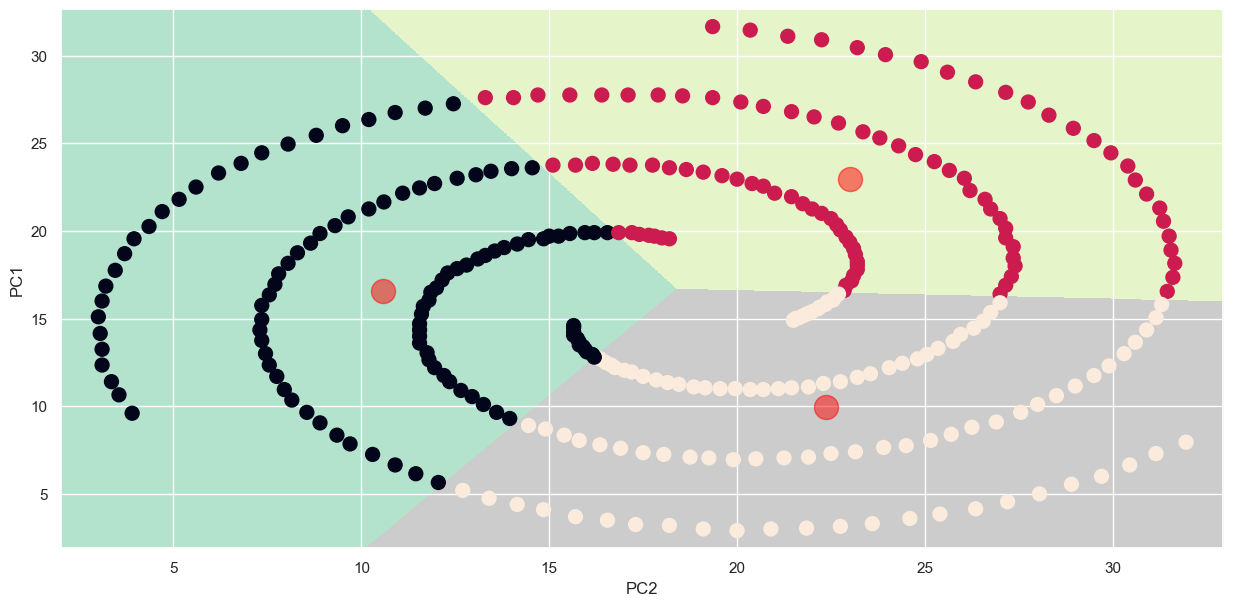

In [342]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


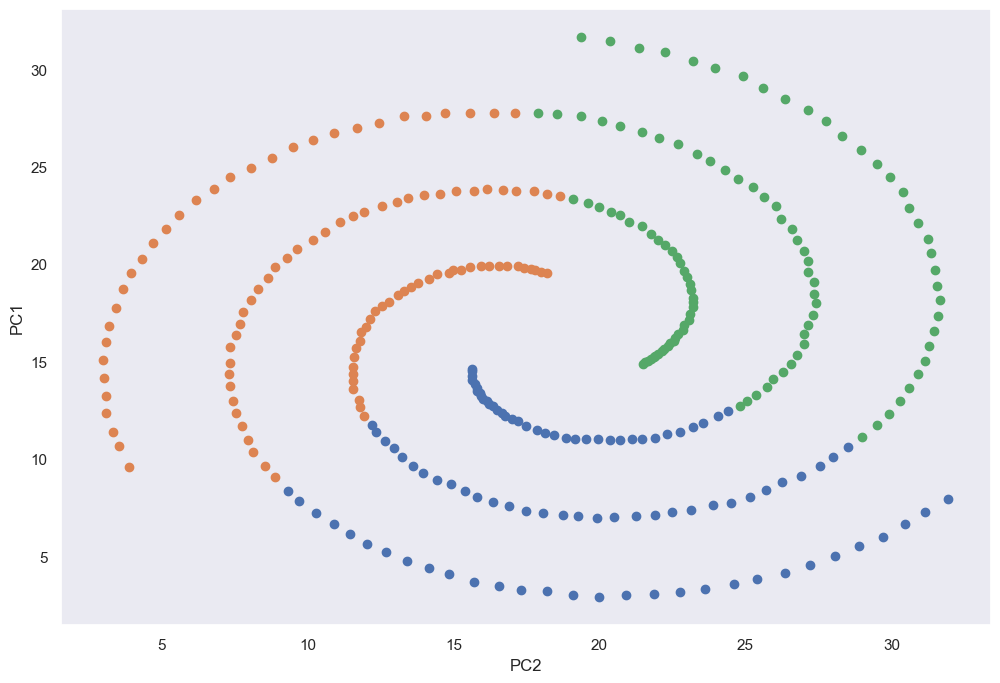

In [343]:
#Compute the clusters for the Circle dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 20).fit(dz) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])

## $\boldsymbol{k=40}$ in Spiral dataset

**Question1 ($\boldsymbol{k=40}$ , SD)**

In [344]:
#construct the k-nearest neighborhood similarity graph and its adjacency matrix 
from sklearn.neighbors import radius_neighbors_graph
W = radius_neighbors_graph(dz,1,mode='distance', metric='minkowski', p=40, metric_params=None, include_self=False) #k=p=40
W = W.toarray()
print("The adjacency matrix is: ")
W

The adjacency matrix is: 


array([[0.000, 0.800, 0.000, ..., 0.000, 0.000, 0.000],
       [0.800, 0.000, 0.701, ..., 0.000, 0.000, 0.000],
       [0.000, 0.701, 0.000, ..., 0.000, 0.000, 0.000],
       ...,
       [0.000, 0.000, 0.000, ..., 0.000, 0.250, 0.350],
       [0.000, 0.000, 0.000, ..., 0.250, 0.000, 0.100],
       [0.000, 0.000, 0.000, ..., 0.350, 0.100, 0.000]])

In [345]:
#Constructing the degree matrix (𝐷)
D = np.diag(W.sum(axis=1))
print(D)

[[0.800 0.000 0.000 ... 0.000 0.000 0.000]
 [0.000 1.501 0.000 ... 0.000 0.000 0.000]
 [0.000 0.000 1.451 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 4.400 0.000 0.000]
 [0.000 0.000 0.000 ... 0.000 3.300 0.000]
 [0.000 0.000 0.000 ... 0.000 0.000 2.700]]


**Question2 ($\boldsymbol{k=40}$ , SD)**

In [346]:
from scipy.sparse import csgraph

# with the function below we can get the Laplacian Matrix(L=D-W) from the adjacency matrix we have from previous section
L = csgraph.laplacian(W, normed=False)

print('The Laplacian Matrix L is: ')
print(L)

print('The first 5 values of L are: ')
print(L[:5,:5])

The Laplacian Matrix L is: 
[[0.800 -0.800 -0.000 ... -0.000 -0.000 -0.000]
 [-0.800 1.501 -0.701 ... -0.000 -0.000 -0.000]
 [-0.000 -0.701 1.451 ... -0.000 -0.000 -0.000]
 ...
 [-0.000 -0.000 -0.000 ... 4.400 -0.250 -0.350]
 [-0.000 -0.000 -0.000 ... -0.250 3.300 -0.100]
 [-0.000 -0.000 -0.000 ... -0.350 -0.100 2.700]]
The first 5 values of L are: 
[[0.800 -0.800 -0.000 -0.000 -0.000]
 [-0.800 1.501 -0.701 -0.000 -0.000]
 [-0.000 -0.701 1.451 -0.750 -0.000]
 [-0.000 -0.000 -0.750 1.550 -0.800]
 [-0.000 -0.000 -0.000 -0.800 1.650]]


**Question3 ($\boldsymbol{k=40}$ , SD)**

In [347]:
#compute the cosine similarity to determine how many connected components there are in the similarity graph
# import required libraries
from numpy.linalg import norm
 
# compute  similarity
cosine = np.dot(df['a'],df['b'])/(norm(df['a'],)*norm(df['b']))
print(" Similarity:", cosine)

 Similarity: 0.8575754202341674


**Question4 ($\boldsymbol{k=40}$ , SD)**

In [348]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# normalised eigenvectors
print('M eigenvectors:')
print(v)

eigenvalues:
[0.000 0.001 0.005 0.011 0.021 0.036 0.045 0.063 0.088 0.103 0.130 0.161
 0.181 0.219 0.255 0.270 0.326 0.387 0.452 0.510 0.548 0.587 0.607 0.673
 0.738 0.806 0.889 0.914 0.952 1.024 1.117 1.184 1.322 1.284 9.280 8.769
 7.735 1.380 1.476 1.485 1.556 1.638 1.770 1.839 1.603 6.955 7.079 6.223
 5.867 3.578 3.427 3.258 3.111 2.968 2.818 1.709 1.821 1.887 2.377 2.429
 2.292 2.251 2.191 2.006 2.013 2.134 2.099 1.961 2.117 5.588 3.390 3.366
 3.194 3.142 3.068 2.625 2.523 2.557 2.554 2.658 2.663 5.412 4.385 2.978
 5.027 4.939 4.822 2.468 2.512 2.900 4.747 2.675 2.722 3.449 3.608 4.549
 4.027 4.241 4.389 4.083 4.349 4.300 3.934 3.801 4.050 3.991 0.000 0.001
 0.005 0.013 0.021 0.033 0.049 0.074 0.092 0.113 0.139 0.173 0.203 0.225
 0.270 0.305 0.364 0.387 0.442 0.473 0.558 0.594 0.658 0.682 1.036 0.976
 0.899 0.851 0.764 0.785 6.319 5.965 1.148 1.199 1.333 1.391 1.481 1.460
 1.568 1.601 1.207 5.334 4.916 4.782 4.612 3.542 4.375 4.365 4.235 3.224
 3.133 3.096 2.999 1.693 1.747 1.790 1

**Question5 ($\boldsymbol{k=40}$  SD)**

In [349]:
# construct the matrix U 
u=v+L
print("the U matrix is: ")
print(u)

the U matrix is: 
[[0.897 -0.637 -0.145 ... 0.000 0.000 0.000]
 [-0.703 1.663 -0.845 ... 0.000 0.000 0.000]
 [0.097 -0.539 1.309 ... 0.000 0.000 0.000]
 ...
 [0.000 0.000 0.000 ... 4.400 -0.250 -0.350]
 [0.000 0.000 0.000 ... -0.250 3.300 -0.100]
 [0.000 0.000 0.000 ... -0.350 -0.100 2.700]]


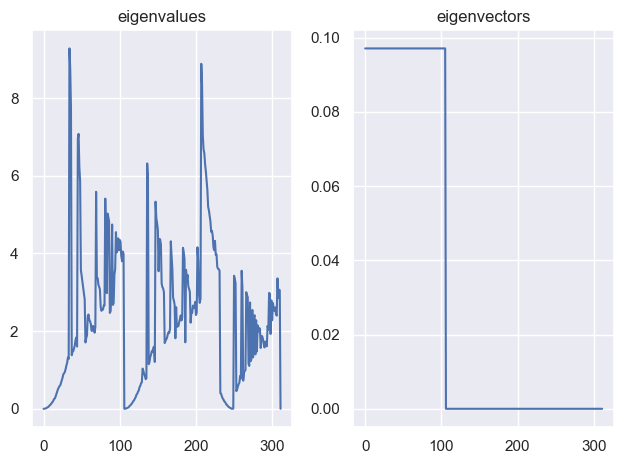

In [350]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
ax2.title.set_text('eigenvectors')
fig.tight_layout()
plt.show()

In [351]:
df=pd.read_csv('Spiral.csv',names=["a", "b", "cluster"], encoding='latin-1')
dz=df.drop(['cluster'], axis=1)

**Question 6,7,8,9 ($\boldsymbol{k=40}$ , SD)**

In [352]:
#Compute the clusters for the Spiral dataset with K-means method 
algorithm = (KMeans(n_clusters = 3,init='k-means++', n_init = 40 ,max_iter=100,
                        tol=0.0001,  random_state= 50  , algorithm='elkan') ) 
algorithm.fit(dz)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [353]:
X1 = dz[['a','b']].iloc[: , :].values

In [354]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


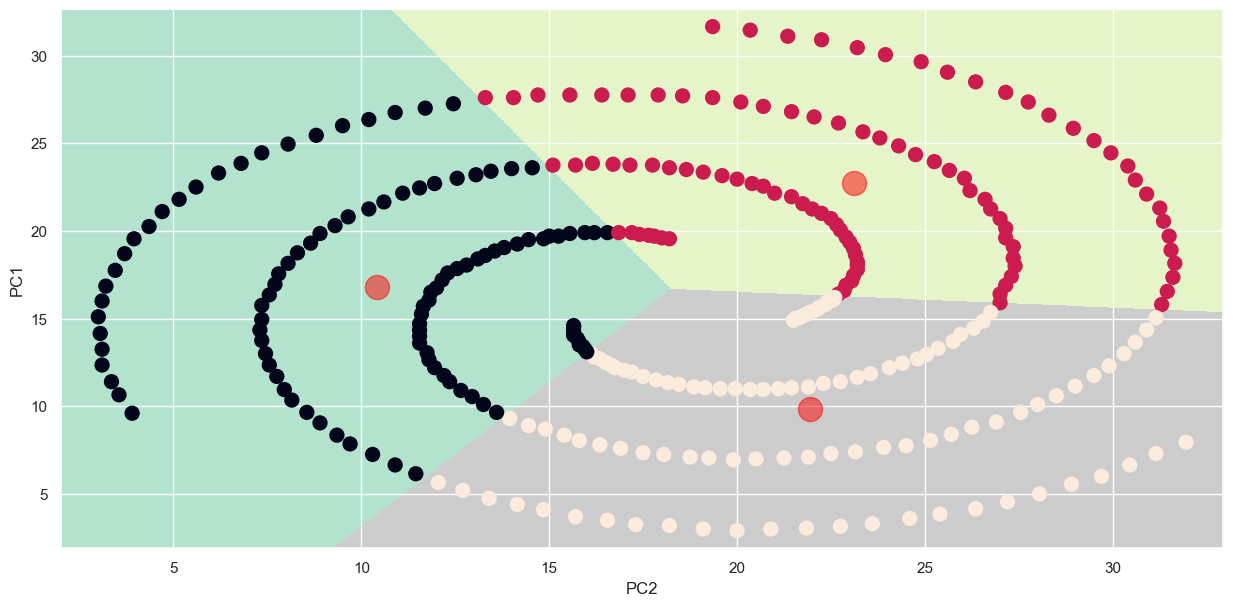

In [355]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'a', y = 'b', data = dz, c = labels1, s = 100)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('PC1') , plt.xlabel('PC2')
plt.show()

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


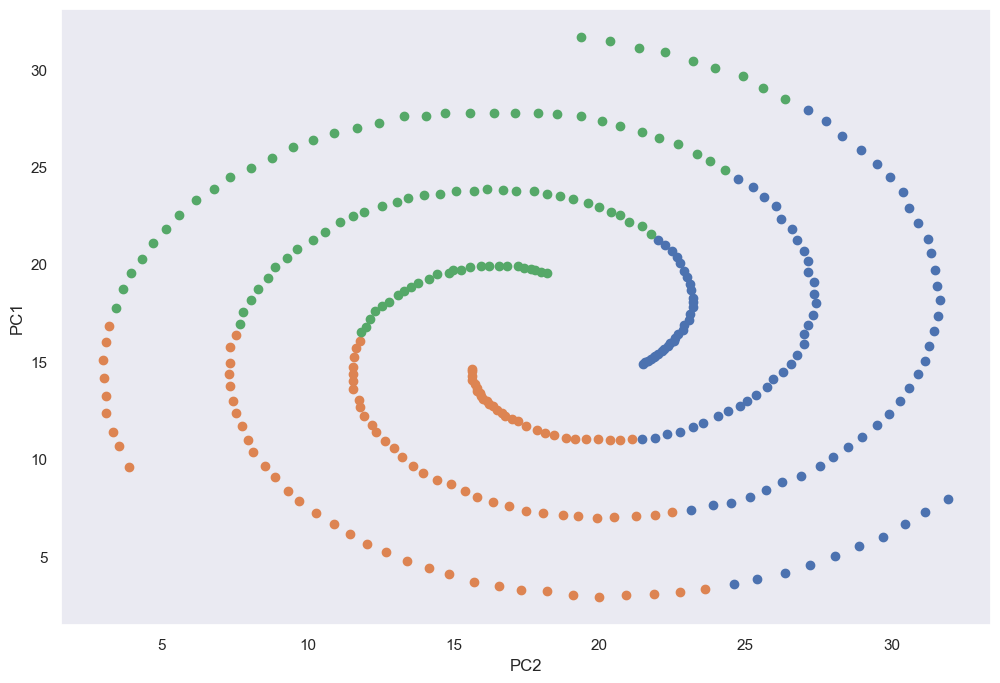

In [356]:
#Compute the clusters for the Spiral dataset with clustering method 
from sklearn.cluster import SpectralClustering
sine_dataset = pd.DataFrame(dz)

## Fitting spectral clustering with 3 clusters
spectral_clustering = SpectralClustering(n_clusters = 3, 
                                         affinity = 'nearest_neighbors',
                                         n_neighbors = 40).fit(dz) 

## Appending cluster to the sine dataset
sine_dataset['spectral_clusters'] = spectral_clustering.labels_


## Visualizing the data with cluster
colors = ['lightblue', 'orange']

plt.figure(figsize = (12, 8))
plt.xlabel('PC2')
plt.ylabel('PC1')
plt.grid()

for c in sine_dataset['spectral_clusters'].unique():
        
        temp = sine_dataset[sine_dataset['spectral_clusters'] == c]
        plt.scatter(temp['a'], temp['b'])